In [1]:
# Stammdaten
rawdataFolder = "C:\\Users\\joerg_j\\switchdrive\\PSI\\22_e-Instrumentation\\HERO\\IPA\\Rohdaten"
campaignId    = "05_Setup_8"
measurementId = "200225_13"
signalAmplitude = 0.2

In [2]:
import sys
sys.path.append("../toolbox/")
from workflow import *
from jitterClass import analyseMeasurement
import importlib

read done


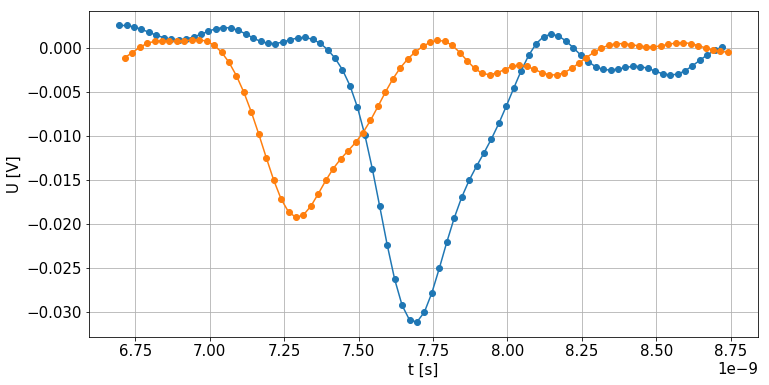

showRawPulse done


In [3]:
M18_02 = analyseMeasurement(rawdataFolder, campaignId, measurementId, signalAmplitude, diagnose = True)

M18_02.read()

M18_02.showRawPulse(pulseNr = 0, style="o-")

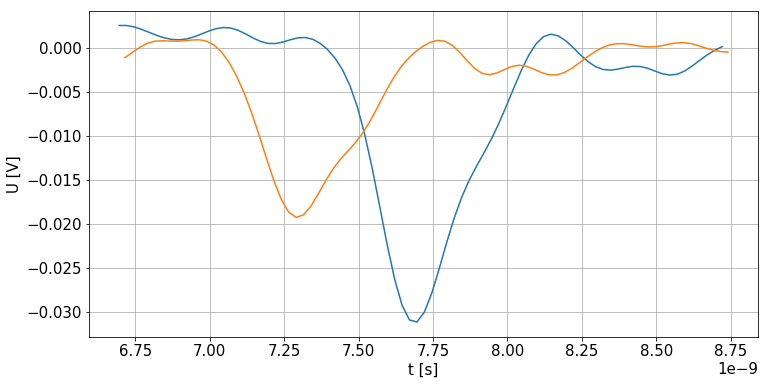

showRawPulse done


In [4]:
M18_02.showRawPulse(pulseNr = 0, style="-")

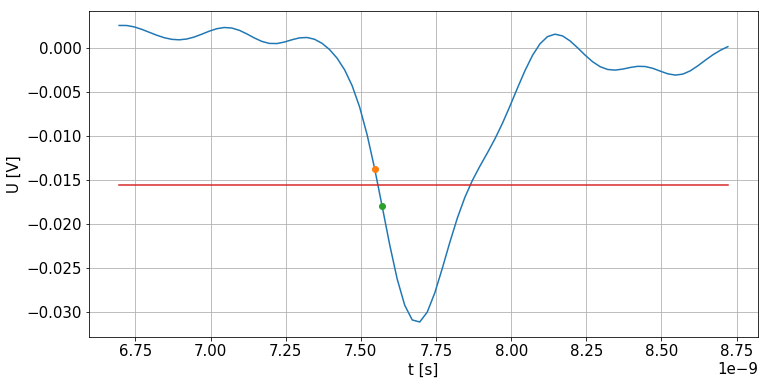

xt: 7.556897655720104e-09 ps, yt -0.015585958425617719 ps


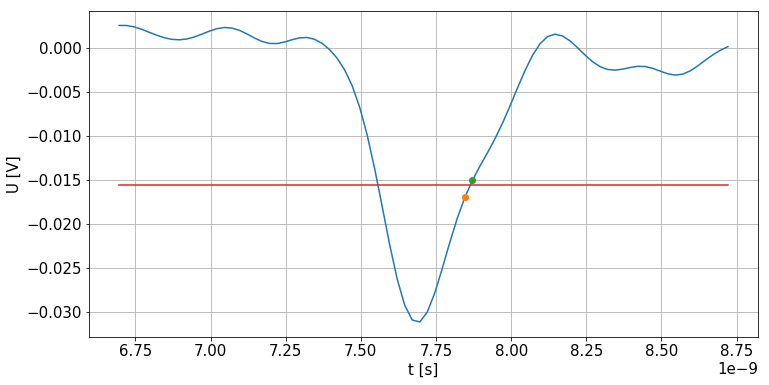

xt: 7.864043998929174e-09 ps, yt -0.015585958425617719 ps


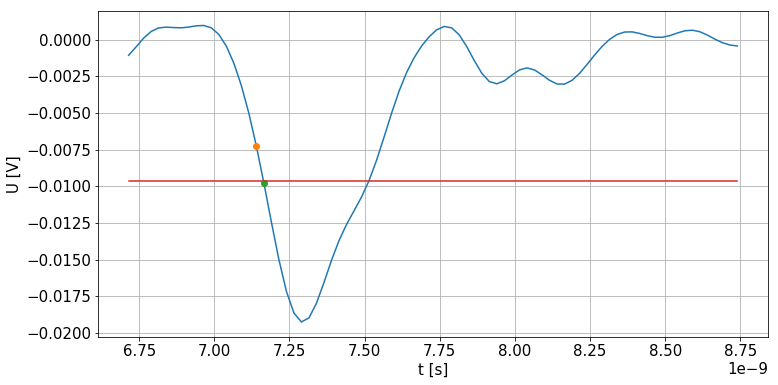

xt: 7.163373476839631e-09 ps, yt -0.009626958505805305 ps


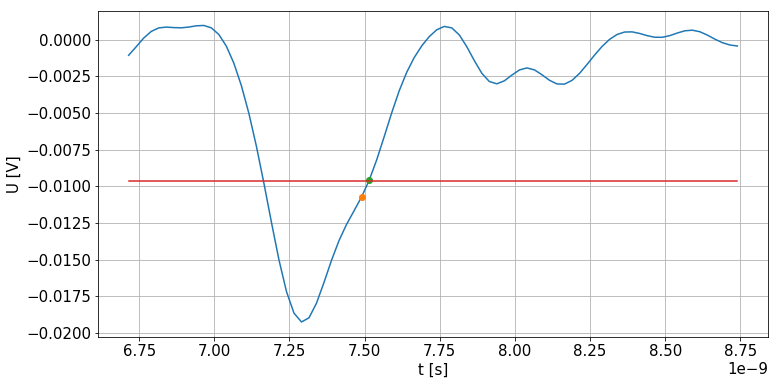

xt: 7.514178412603514e-09 ps, yt -0.009626958505805305 ps
calculateDelta done
calculateDelta done
calculateDelta done


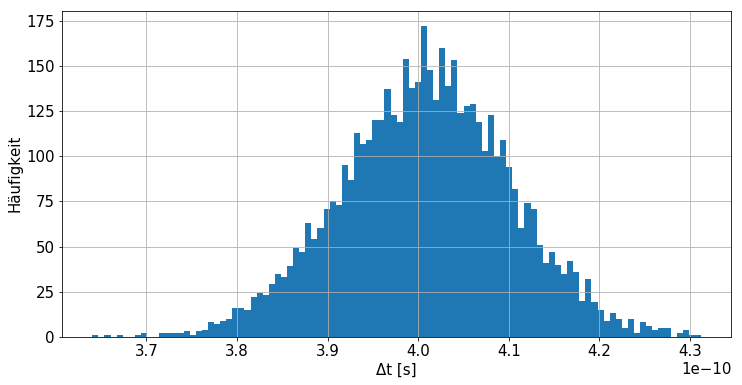

histogram done


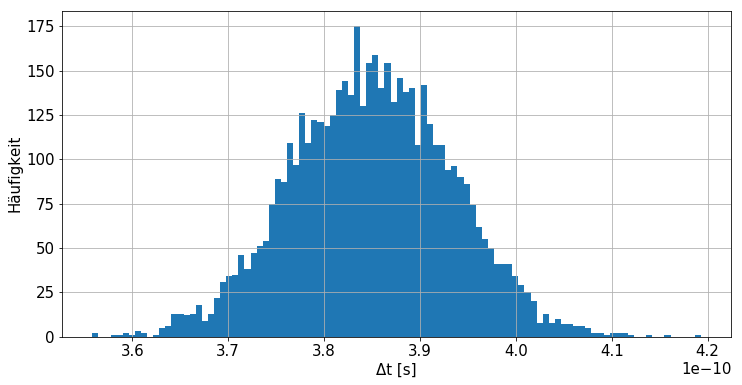

histogram done


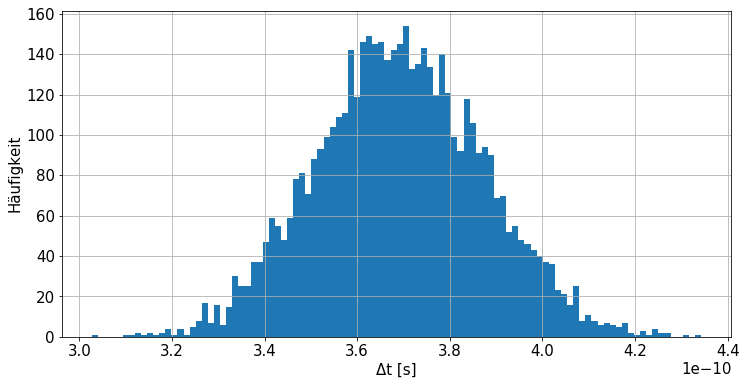

histogram done
54


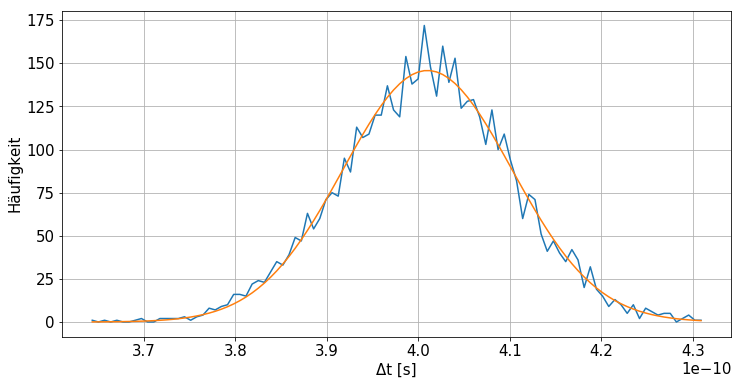

parameter: [3.37626825e-09 4.00999027e-10 9.23264554e-12] [A, mu, sigma]
fitHist done
43


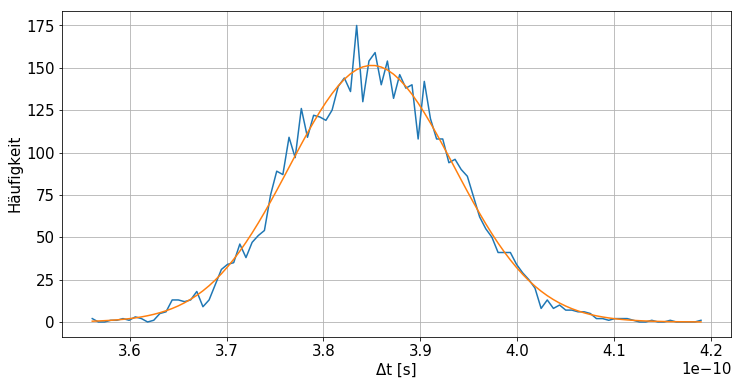

parameter: [3.22293254e-09 3.84994135e-10 8.48929189e-12] [A, mu, sigma]
fitHist done
51


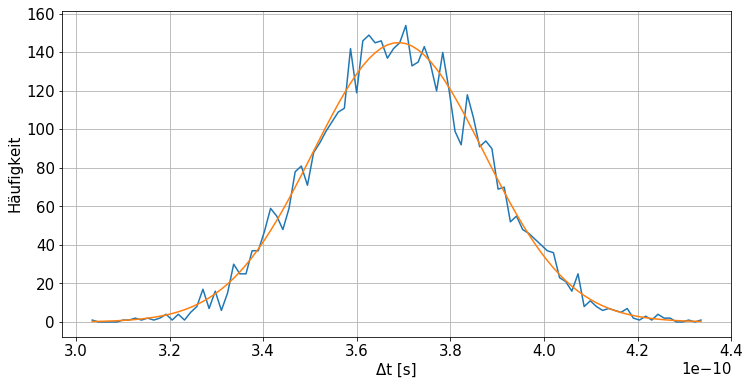

parameter: [6.64976553e-09 3.68895303e-10 1.82820613e-11] [A, mu, sigma]
fitHist done


In [11]:
absolute = False
threshold = 0.5

if(absolute):
    s = "Abs"
else:
    s = "Rel"
name = "thres{:d}".format(int(threshold * 100)) + s
 
M18_02.threshold(absolute = absolute, threshold = threshold)

M18_02.calculateDelta(name + "F", M18_02.data["thres"][name][0,0,:,0], M18_02.data["thres"][name][1,0,:,0])
M18_02.calculateDelta(name + "C", M18_02.data["thres"][name][0,1,:,0], M18_02.data["thres"][name][1,1,:,0])
M18_02.calculateDelta(name + "R", M18_02.data["thres"][name][0,2,:,0], M18_02.data["thres"][name][1,2,:,0])

M18_02.histogram(name + "F", name + "F")
M18_02.histogram(name + "C", name + "C")
M18_02.histogram(name + "R", name + "R")

M18_02.fitHist(name + "F", name + "F")
M18_02.fitHist(name + "C", name + "C")
M18_02.fitHist(name + "R", name + "R")

In [12]:
M18_02.showResult(name + "F")
print("---------------------------------------------------------------------------------------")
M18_02.showResult(name + "C")
print("---------------------------------------------------------------------------------------")
M18_02.showResult(name + "R")

σ_0: 9.2326455434365 ps
σ_1: 6.528466272055705 ps
σ_1 = σ_0 / sqrt(2)

μ: 400.99902650556476 ps

coma separated [σ_0, σ_1, μ]
9.232645543436498e-12,6.5284662720557045e-12,4.009990265055648e-10

 tab separated [σ_0, σ_1, μ]
9.232645543436498e-12	6.5284662720557045e-12	4.009990265055648e-10
---------------------------------------------------------------------------------------
σ_0: 8.489291893179978 ps
σ_1: 6.002835865139546 ps
σ_1 = σ_0 / sqrt(2)

μ: 384.99413460344783 ps

coma separated [σ_0, σ_1, μ]
8.489291893179978e-12,6.002835865139546e-12,3.8499413460344785e-10

 tab separated [σ_0, σ_1, μ]
8.489291893179978e-12	6.002835865139546e-12	3.8499413460344785e-10
---------------------------------------------------------------------------------------
σ_0: 18.282061344405157 ps
σ_1: 12.927369550697335 ps
σ_1 = σ_0 / sqrt(2)

μ: 368.89530318408856 ps

coma separated [σ_0, σ_1, μ]
1.8282061344405157e-11,1.2927369550697335e-11,3.6889530318408855e-10

 tab separated [σ_0, σ_1, μ]
1.82820613444

iPeak: 40 iLeft: 31 iRight: 53


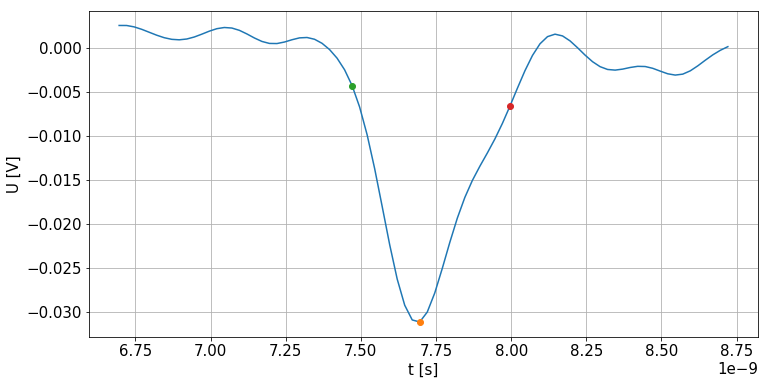

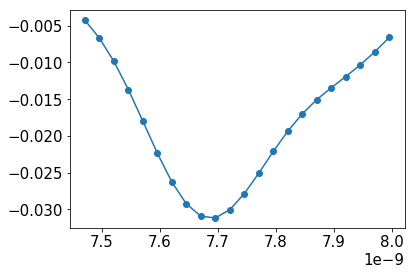

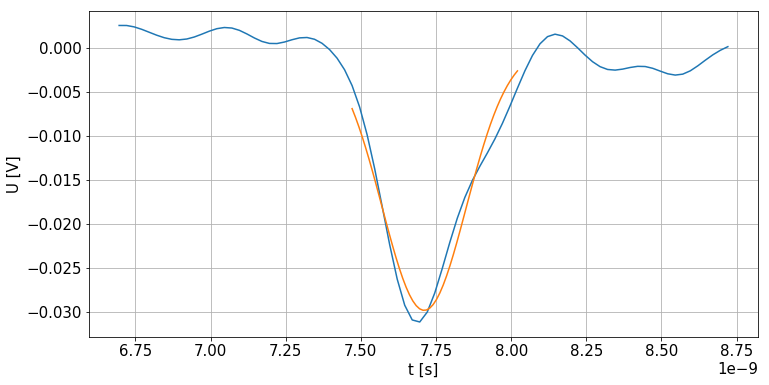

parameter: [-1.04724554e-11  7.71088125e-09  1.39958020e-10] [A, mu, sigma]
iPeak: 23 iLeft: 15 iRight: 36


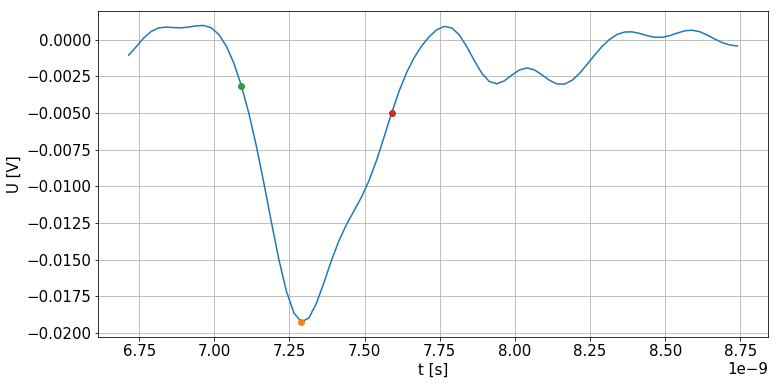

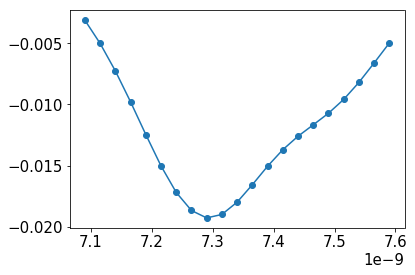

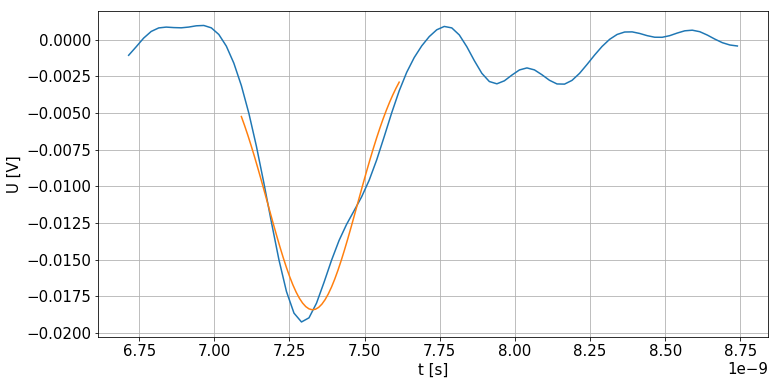

parameter: [-6.90564087e-12  7.32715237e-09  1.49551461e-10] [A, mu, sigma]
fitGauss done
calculateDelta done


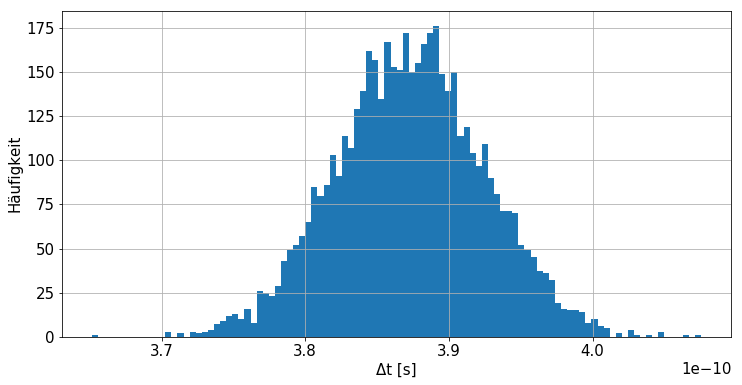

histogram done
56


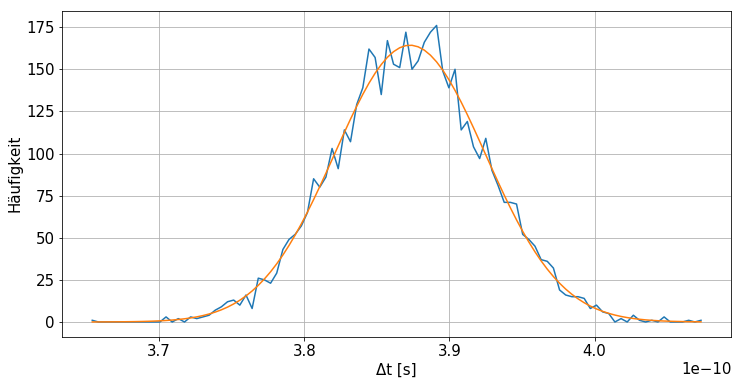

parameter: [2.14077392e-09 3.87284010e-10 5.19821624e-12] [A, mu, sigma]
fitHist done


In [7]:
M18_02.fitGauss(threshold = 0.2, diagnosePulse=0)

M18_02.calculateDelta("gauss", M18_02.data["gauss"][0,:,1], M18_02.data["gauss"][1,:,1])

M18_02.histogram("gauss", "gauss")

M18_02.fitHist("gauss", "gauss")

In [8]:
M18_02.showResult("gauss")

σ_0: 5.198216238916871 ps
σ_1: 3.6756939526121495 ps
σ_1 = σ_0 / sqrt(2)

μ: 387.28401012712396 ps

coma separated [σ_0, σ_1, μ]
5.198216238916871e-12,3.6756939526121495e-12,3.8728401012712397e-10

 tab separated [σ_0, σ_1, μ]
5.198216238916871e-12	3.6756939526121495e-12	3.8728401012712397e-10


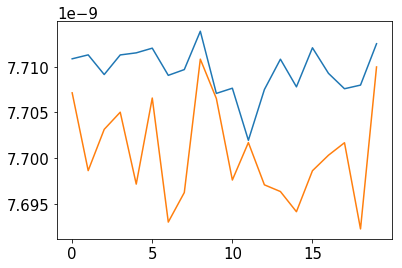

In [10]:
plt.plot(M18_02.data["gauss"][0,:,1][:20])
plt.plot(M18_02.data["gauss"][1,:,1][0:20] + 0.38e-9)

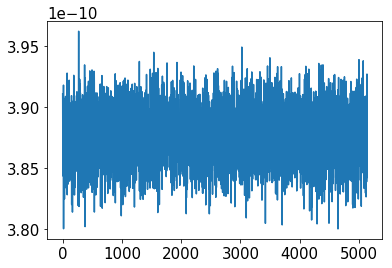

In [10]:
plt.plot(M18_02.data["gauss"][0,:,1] - M18_02.data["gauss"][1,:,1])

In [11]:
%load_ext autoreload

In [ ]:
exportedDict = M18_02.exportDict()
%autoreload
M18_02 = analyseMeasurement(diagnose = True)
M18_02.importDict(exportedDict)